In [43]:
#First Deep Learning Tutorial
import tensorflow as tf

#Gets the data from mnist dataset of handwritten numbers
mnist = tf.keras.datasets.mnist

#Loading data into array
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalizing the data to within 1, so it is easier to train.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#Training Model: First Sequentially, then Flatten, then 2 hidden layers of Dense,
#                followed by output 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2637 - acc: 0.9235
Epoch 2/3
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1068 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0737 - acc: 0.9769


In [19]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0967 - acc: 0.9712
0.09674426546134055 0.9712


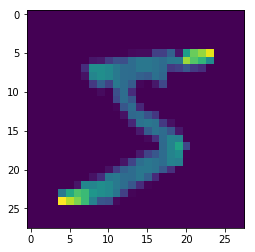

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [42]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()
print(x_train[0])

In [21]:
model.save('cool_num_reader.model')

In [24]:
new_model = tf.keras.models.load_model('cool_num_reader.model')

In [31]:
predictions = new_model.predict(x_test)

In [39]:
print(predictions)

[[1.90826697e-08 2.20130336e-09 6.90823799e-06 ... 9.99232888e-01
  5.74872558e-07 3.22662885e-07]
 [4.07353937e-08 1.95925240e-05 9.99916196e-01 ... 5.05880982e-09
  2.91450526e-08 4.97526228e-13]
 [2.58480327e-07 9.99160409e-01 6.94629998e-05 ... 1.14280410e-04
  1.86865247e-04 4.60299930e-07]
 ...
 [2.77015633e-10 7.23726146e-09 1.13017251e-09 ... 5.40930444e-07
  3.95025040e-07 3.39588514e-05]
 [1.56223609e-06 5.08928053e-07 3.41689230e-07 ... 3.07695871e-07
  2.17240420e-03 2.52332839e-08]
 [7.94311745e-07 5.01323116e-09 2.79758439e-07 ... 7.15125919e-12
  7.29952845e-08 1.15458745e-08]]


In [40]:
import numpy as np

print(np.argmax(predictions[9]))

9


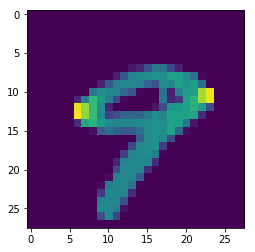

In [41]:
plt.imshow(x_test[9])
plt.show()